In [1]:
import pandas as pd
import cmapPy.pandasGEXpress.parse as parse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_dir = '../0A.download-data/data/'
output_dir = 'data/'

In [3]:
phase1_gctoo = parse.parse(input_dir + 'GSE92742_Broad_LINCS_Level5_COMPZ.MODZ_n473647x12328.gctx')
phase2_gctoo = parse.parse(input_dir + 'GSE70138_Broad_LINCS_Level5_COMPZ_n118050x12328_2017-03-06.gctx')

In [4]:
phase1_data_df = phase1_gctoo.data_df.transpose()
phase2_data_df = phase2_gctoo.data_df.transpose()

In [5]:
gene_info = pd.read_csv(input_dir + 'GSE92742_Broad_LINCS_gene_info.txt.gz', sep = "\t")
landmark_genes = np.char.mod('%d',gene_info[gene_info.pr_is_lm == 1].pr_gene_id)

In [6]:
#slicing the dataframe to only include landmark genes
phase1_data_df = phase1_data_df.loc[:,phase1_data_df.columns.isin(landmark_genes)]
phase2_data_df = phase2_data_df.loc[:,phase2_data_df.columns.isin(landmark_genes)]

In [7]:
#add pert_id and cell_id metadata column to phase1_data_df
phase1_sig_info = pd.read_csv(input_dir + 'GSE92742_Broad_LINCS_sig_info.txt.gz', sep = "\t").set_index('sig_id').reindex(index=phase1_data_df.index)
phase1_sig_info = phase1_sig_info.loc[:,phase1_sig_info.columns.isin(['pert_id','cell_id'])]
phase1_df = pd.concat([phase1_sig_info,phase1_data_df], axis=1).reset_index()
phase1_df.head()

/home/ubuntu/miniconda3/envs/cell-painting-vae/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cid,pert_id,cell_id,5720,466,6009,2309,387,3553,427,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,CPC005_A375_6H:BRD-A85280935-003-01-7:10,BRD-A85280935,A375,0.773769,-0.818468,0.189572,-0.146031,-0.654002,0.206183,0.626013,...,-1.191830,-0.061229,-0.505697,0.339170,-0.133465,0.651272,0.196972,0.000822,-0.118087,-0.540854
1,CPC005_A375_6H:BRD-A07824748-001-02-6:10,BRD-A07824748,A375,-0.645586,-0.810749,0.459060,-0.224676,-0.335681,2.804548,-0.125799,...,-1.836194,1.507439,-0.571273,1.174893,4.993051,0.908271,-2.183036,-1.593815,-0.200885,-1.985022
2,CPC004_A375_6H:BRD-K20482099-001-01-1:10,BRD-K20482099,A375,-5.449666,2.393775,1.279790,2.167868,2.333199,1.649395,2.004065,...,-0.352764,2.288361,-0.370153,4.419082,-1.994474,-0.844823,1.017626,-5.340797,-2.409926,2.094843
3,CPC005_A375_6H:BRD-K62929068-001-03-3:10,BRD-K62929068,A375,0.193408,-0.582243,-0.178977,-1.182025,-1.012651,1.753655,-0.988824,...,0.394868,0.418696,-0.712170,-0.002733,0.433721,0.516296,-1.434045,0.340841,0.074960,-5.317751
4,CPC005_A375_6H:BRD-K43405658-001-01-8:10,BRD-K43405658,A375,1.006298,0.455536,0.631738,-0.936414,-1.213203,1.662564,-0.239190,...,-1.938225,3.251216,-0.498275,3.756618,0.284775,0.785232,-0.346764,-1.431072,0.186842,0.186379


In [7]:
#add pert_id and cell_id metadata column to phase2_data_df
phase2_sig_info = pd.read_csv(input_dir + 'GSE70138_Broad_LINCS_sig_info_2017-03-06.txt.gz', sep = "\t").set_index('sig_id').reindex(index=phase2_data_df.index)
phase2_sig_info = phase2_sig_info.loc[:,phase2_sig_info.columns.isin(['pert_id','cell_id'])]
phase2_df = pd.concat([phase2_sig_info,phase2_data_df], axis=1).reset_index()
phase2_df.head()

,cid,pert_id,cell_id,780,7849,6193,23,9552,387,10921,...,54681,11000,6915,6253,7264,5467,2767,23038,57048,79716
0,REP.A001_A375_24H:A03,DMSO,A375,4.264143,0.057249,-2.139334,-0.221784,-0.376555,1.913788,0.065576,...,5.246200,0.057058,-1.256173,-0.025255,0.168856,-1.639110,0.685100,-0.419421,1.716090,-0.472335
1,REP.A001_A375_24H:A04,DMSO,A375,-0.382211,0.304313,-0.995924,-0.670834,-0.648242,0.621605,0.889530,...,0.206695,-0.010866,-0.872055,-0.223754,0.074144,0.093595,0.326673,1.048097,-0.505179,-0.618324
2,REP.A001_A375_24H:A05,DMSO,A375,-0.571711,-0.754999,-0.710110,0.428894,0.272606,0.314359,-1.545846,...,-0.005612,1.194516,0.171107,0.334370,-1.089265,-0.114638,0.304832,-0.249467,-0.428352,1.584976
3,REP.A001_A375_24H:A06,DMSO,A375,0.584376,-0.589973,-0.026398,-0.065268,0.542223,1.165725,-0.941270,...,-1.241074,0.195744,-0.521218,0.569789,-1.361676,0.226151,0.404963,-4.357310,0.076562,-0.113679
4,REP.A001_A375_24H:A07,BRD-K25114078,A375,0.658348,-0.226854,-1.143599,0.342426,0.380470,1.470282,0.572023,...,0.155589,4.089654,0.220555,-0.313333,-0.040246,-0.250033,-0.952898,-0.011989,-0.092549,0.423315


In [10]:
# print(phase2_df.shape)
phase2_df.groupby('cell_id').count().sort_values('cid')

,cid,pert_id,780,7849,6193,23,9552,387,10921,10285,...,54681,11000,6915,6253,7264,5467,2767,23038,57048,79716
cell_id,,,,,,,,,,,,,,,,,,,,,
HUES3,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
JURKAT,366,366,366,366,366,366,366,366,366,366,...,366,366,366,366,366,366,366,366,366,366
MNEU.E,377,377,377,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,377,377
MCF7.311,379,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
YAPC.311,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
MCF7.101,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
HELA.311,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
HA1E.311,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
HA1E.101,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380


In [9]:
#add inchikey metadata column to phase1_data_df
phase1_pert_info = pd.read_csv(input_dir + "GSE92742_Broad_LINCS_pert_info.txt.gz", sep = '\t').set_index('pert_id').reindex(index=phase1_df.pert_id)
phase1_pert_info = phase1_pert_info.loc[:,phase1_pert_info.columns == 'inchi_key_prefix']
phase1_df = phase1_df.set_index("pert_id")
phase1_df = pd.concat([phase1_pert_info, phase1_df], axis=1).reset_index()
phase1_df.head()

,pert_id,inchi_key_prefix,cid,cell_id,5720,466,6009,2309,387,3553,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,BRD-A85280935,FTSUPYGMFAPCFZ,CPC005_A375_6H:BRD-A85280935-003-01-7:10,A375,0.773769,-0.818468,0.189572,-0.146031,-0.654002,0.206183,...,-1.191830,-0.061229,-0.505697,0.339170,-0.133465,0.651272,0.196972,0.000822,-0.118087,-0.540854
1,BRD-A07824748,ZONYXWQDUYMKFB,CPC005_A375_6H:BRD-A07824748-001-02-6:10,A375,-0.645586,-0.810749,0.459060,-0.224676,-0.335681,2.804548,...,-1.836194,1.507439,-0.571273,1.174893,4.993051,0.908271,-2.183036,-1.593815,-0.200885,-1.985022
2,BRD-K20482099,IKGXIBQEEMLURG,CPC004_A375_6H:BRD-K20482099-001-01-1:10,A375,-5.449666,2.393775,1.279790,2.167868,2.333199,1.649395,...,-0.352764,2.288361,-0.370153,4.419082,-1.994474,-0.844823,1.017626,-5.340797,-2.409926,2.094843
3,BRD-K62929068,NWBJYWHLCVSVIJ,CPC005_A375_6H:BRD-K62929068-001-03-3:10,A375,0.193408,-0.582243,-0.178977,-1.182025,-1.012651,1.753655,...,0.394868,0.418696,-0.712170,-0.002733,0.433721,0.516296,-1.434045,0.340841,0.074960,-5.317751
4,BRD-K43405658,UMGQVUWXNOJOSJ,CPC005_A375_6H:BRD-K43405658-001-01-8:10,A375,1.006298,0.455536,0.631738,-0.936414,-1.213203,1.662564,...,-1.938225,3.251216,-0.498275,3.756618,0.284775,0.785232,-0.346764,-1.431072,0.186842,0.186379


In [10]:
#add inchikey metadata column to phase2_data_df
phase2_pert_info = pd.read_csv(input_dir + "GSE70138_Broad_LINCS_pert_info.txt.gz", sep = '\t').set_index('pert_id').reindex(index=phase2_df.pert_id)
phase2_pert_info = phase2_pert_info.loc[:,phase2_pert_info.columns == 'inchi_key']
phase2_pert_info['inchi_key'] = phase2_pert_info.inchi_key.str.split("-").str[0]
phase2_pert_info = phase2_pert_info.rename(columns={"inchi_key": "inchi_key_prefix"})
phase2_df = phase2_df.set_index("pert_id")
phase2_df = pd.concat([phase2_pert_info, phase2_df], axis=1).reset_index()
phase2_df.head()

,pert_id,inchi_key_prefix,cid,cell_id,780,7849,6193,23,9552,387,...,54681,11000,6915,6253,7264,5467,2767,23038,57048,79716
0,DMSO,IAZDPXIOMUYVGZ,REP.A001_A375_24H:A03,A375,4.264143,0.057249,-2.139334,-0.221784,-0.376555,1.913788,...,5.246200,0.057058,-1.256173,-0.025255,0.168856,-1.639110,0.685100,-0.419421,1.716090,-0.472335
1,DMSO,IAZDPXIOMUYVGZ,REP.A001_A375_24H:A04,A375,-0.382211,0.304313,-0.995924,-0.670834,-0.648242,0.621605,...,0.206695,-0.010866,-0.872055,-0.223754,0.074144,0.093595,0.326673,1.048097,-0.505179,-0.618324
2,DMSO,IAZDPXIOMUYVGZ,REP.A001_A375_24H:A05,A375,-0.571711,-0.754999,-0.710110,0.428894,0.272606,0.314359,...,-0.005612,1.194516,0.171107,0.334370,-1.089265,-0.114638,0.304832,-0.249467,-0.428352,1.584976
3,DMSO,IAZDPXIOMUYVGZ,REP.A001_A375_24H:A06,A375,0.584376,-0.589973,-0.026398,-0.065268,0.542223,1.165725,...,-1.241074,0.195744,-0.521218,0.569789,-1.361676,0.226151,0.404963,-4.357310,0.076562,-0.113679
4,BRD-K25114078,HAMNKKUPIHEESI,REP.A001_A375_24H:A07,A375,0.658348,-0.226854,-1.143599,0.342426,0.380470,1.470282,...,0.155589,4.089654,0.220555,-0.313333,-0.040246,-0.250033,-0.952898,-0.011989,-0.092549,0.423315


In [11]:
#combine phase1 and phase 2, and add rna_plate metadata feature
combined_df = pd.concat([phase1_df,phase2_df])
combined_df['cid'] = combined_df.cid.str.split(":").str[0]
combined_df = combined_df.rename(columns={"cid": "rna_plate"})
print(combined_df.shape)
combined_df.head()

(591697, 982)


,pert_id,inchi_key_prefix,rna_plate,cell_id,5720,466,6009,2309,387,3553,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,BRD-A85280935,FTSUPYGMFAPCFZ,CPC005_A375_6H,A375,0.773769,-0.818468,0.189572,-0.146031,-0.654002,0.206183,...,-1.191830,-0.061229,-0.505697,0.339170,-0.133465,0.651272,0.196972,0.000822,-0.118087,-0.540854
1,BRD-A07824748,ZONYXWQDUYMKFB,CPC005_A375_6H,A375,-0.645586,-0.810749,0.459060,-0.224676,-0.335681,2.804548,...,-1.836194,1.507439,-0.571273,1.174893,4.993051,0.908271,-2.183036,-1.593815,-0.200885,-1.985022
2,BRD-K20482099,IKGXIBQEEMLURG,CPC004_A375_6H,A375,-5.449666,2.393775,1.279790,2.167868,2.333199,1.649395,...,-0.352764,2.288361,-0.370153,4.419082,-1.994474,-0.844823,1.017626,-5.340797,-2.409926,2.094843
3,BRD-K62929068,NWBJYWHLCVSVIJ,CPC005_A375_6H,A375,0.193408,-0.582243,-0.178977,-1.182025,-1.012651,1.753655,...,0.394868,0.418696,-0.712170,-0.002733,0.433721,0.516296,-1.434045,0.340841,0.074960,-5.317751
4,BRD-K43405658,UMGQVUWXNOJOSJ,CPC005_A375_6H,A375,1.006298,0.455536,0.631738,-0.936414,-1.213203,1.662564,...,-1.938225,3.251216,-0.498275,3.756618,0.284775,0.785232,-0.346764,-1.431072,0.186842,0.186379


In [13]:
# cell_painting_df = pd.read_csv('https://github.com/yuenler/cell-painting-vae/raw/master/0.preprocessing/data/cell_painting_complete.tsv.gz', sep = "\t")
# cell_painting_pert_id = cell_painting_df.Metadata_broad_sample.to_list()
# for i in range(len(cell_painting_pert_id)):
#     if cell_painting_pert_id[i][:3] == "BRD":
#         cell_painting_pert_id[i] = cell_painting_pert_id[i][:13]

In [14]:
# # ids = pd.read_csv("data/repurposing_samples_20200324.txt", sep = "\t").loc[:,['broad_id','deprecated_broad_id']].dropna().reset_index(drop = True)
# cell_painting_inchi = pd.read_csv("https://github.com/broadinstitute/lincs-cell-painting/raw/master/metadata/moa/repurposing_info_external_moa_map_resolved.tsv", sep = "\t").loc[:,['broad_sample','InChIKey14']].dropna().set_index('broad_sample').reindex(index = cell_painting_df.Metadata_broad_sample)
# cell_painting_df = cell_painting_df.set_index("Metadata_broad_sample")
# cell_painting_df = pd.concat([cell_painting_inchi, cell_painting_df], axis=1).reset_index()
# # temp_ids = pd.DataFrame(columns = ['broad_id','deprecated_broad_id'])

# # for index, row in ids.iterrows():
# #     split_rows = row.deprecated_broad_id.split("|")
# #     for split_row in split_rows:
# #         temp_ids = temp_ids.append({'broad_id':row.broad_id, 'deprecated_broad_id':split_row}, ignore_index = True)

# # ids = pd.DataFrame(temp_ids)

# # ids.broad_id = ids.broad_id.apply(lambda x: str(x)[:13]).to_list()
# # ids.deprecated_broad_id = ids.deprecated_broad_id.apply(lambda x: str(x)[:13]).to_list()
# # ids = ids.set_index('deprecated_broad_id').to_dict()['broad_id']
# # len(ids)
# cell_painting_df

,Metadata_broad_sample,InChIKey14,Metadata_Plate_Map_Name,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_unique_id,Cells_AreaShape_FormFactor,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_2_2,...,Nuclei_Texture_SumAverage_AGP_5_0,Nuclei_Texture_SumEntropy_AGP_10_0,Nuclei_Texture_SumEntropy_AGP_20_0,Nuclei_Texture_SumEntropy_AGP_5_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_DNA_20_0,Nuclei_Texture_Variance_DNA_5_0
0,BRD-A25234499-001-18-3,ROBVIMPUHSLWNV,C-7161-01-LM6-001,B13,10.00000,6,BRD-A25234499-001-18-3_dose_6,0.57016,0.59500,0.57370,...,0.164260,0.22701,0.20854,0.22897,0.53738,0.43547,0.41635,0.28933,0.34017,0.31368
1,BRD-A25234499-001-18-3,ROBVIMPUHSLWNV,C-7161-01-LM6-001,B14,3.33330,5,BRD-A25234499-001-18-3_dose_5,0.54840,0.53949,0.58096,...,0.184110,0.23932,0.21854,0.24763,0.56995,0.47084,0.37764,0.32148,0.36964,0.34328
2,BRD-A25234499-001-18-3,ROBVIMPUHSLWNV,C-7161-01-LM6-001,B15,1.11110,4,BRD-A25234499-001-18-3_dose_4,0.56057,0.59621,0.59116,...,0.175640,0.23366,0.21743,0.23448,0.56980,0.47254,0.39575,0.31969,0.36626,0.34086
3,BRD-A25234499-001-18-3,ROBVIMPUHSLWNV,C-7161-01-LM6-001,B16,0.37037,3,BRD-A25234499-001-18-3_dose_3,0.58616,0.57190,0.60374,...,0.141310,0.18764,0.17342,0.18641,0.54696,0.44890,0.40042,0.30187,0.35082,0.32103
4,BRD-A25234499-001-18-3,ROBVIMPUHSLWNV,C-7161-01-LM6-001,B17,0.12346,2,BRD-A25234499-001-18-3_dose_2,0.56834,0.57879,0.57848,...,0.094635,0.16631,0.15218,0.15540,0.56882,0.46601,0.40149,0.31658,0.36167,0.33338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,DMSO,NaN,C-7161-01-LM6-028,J14,0.00000,0,DMSO_dose_0,0.61578,0.60687,0.61502,...,0.100720,0.14855,0.13111,0.14353,0.56531,0.46696,0.41514,0.31995,0.37648,0.34551
10364,DMSO,NaN,C-7161-01-LM6-028,J15,0.00000,0,DMSO_dose_0,0.61671,0.57063,0.63924,...,0.086779,0.15706,0.14290,0.14776,0.58396,0.47729,0.42127,0.33515,0.38281,0.35893
10365,DMSO,NaN,C-7161-01-LM6-028,J16,0.00000,0,DMSO_dose_0,0.62662,0.58973,0.64742,...,0.078534,0.13758,0.12979,0.13059,0.59190,0.47741,0.41545,0.34258,0.39236,0.37102
10366,DMSO,NaN,C-7161-01-LM6-028,J17,0.00000,0,DMSO_dose_0,0.61418,0.60010,0.60166,...,0.069036,0.12488,0.11608,0.11695,0.57666,0.46867,0.40558,0.32921,0.37749,0.35309


In [14]:
# combined_df = combined_df.replace({"pert_id": ids})

In [15]:
# for i in range(len(cell_painting_pert_id)):
#     if cell_painting_pert_id[i] in ids.keys():
#         cell_painting_pert_id[i] = ids[cell_painting_pert_id[i]]

In [14]:
# cell_painting_inchi = cell_painting_df.InChIKey14.to_list()
# overlapped_df = combined_df[combined_df.inchi_key_prefix.isin(cell_painting_inchi)].reset_index(drop = True)
# print(overlapped_df.shape)
# overlapped_df.head()
# overlapped_df
# # overlapped_df = combined_df[combined_df.pert_id.isin(cell_painting_pert_id)].reset_index(drop = True)
# # print(overlapped_df.shape)
# # overlapped_df.head()
# # overlapped_df

(112304, 982)


,pert_id,inchi_key_prefix,rna_plate,cell_id,5720,466,6009,2309,387,3553,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
0,BRD-K20482099,IKGXIBQEEMLURG,CPC004_A375_6H,A375,-5.449666,2.393775,1.279790,2.167868,2.333199,1.649395,...,-0.352764,2.288361,-0.370153,4.419082,-1.994474,-0.844823,1.017626,-5.340797,-2.409926,2.094843
1,BRD-A14966924,FZSPJBYOKQPKCD,CPC004_A375_6H,A375,0.063297,-0.962553,0.521553,0.182361,0.572183,-0.041685,...,0.384030,-0.255260,-0.498031,0.311248,-0.988489,0.225197,-1.613519,-0.539124,-3.080464,-0.727252
2,BRD-K79131256,HXHWSAZORRCQMX,CPC004_A375_6H,A375,0.560929,-0.656688,0.520286,-0.315654,-0.187850,-0.958807,...,0.027064,0.202134,0.620417,-0.723491,-0.270963,0.413583,-0.266161,-0.898610,-0.004253,-0.247177
3,BRD-K30020243,UXOWGYHJODZGMF,CPC004_A375_6H,A375,0.287297,-0.873302,0.183149,-0.040223,-0.652051,0.584937,...,-0.402779,-0.391110,0.003591,-0.750358,0.297145,0.404867,-0.497781,1.090549,0.336988,0.161319
4,BRD-A27554692,VWAUPFMBXBWEQY,CPC004_A375_6H,A375,-4.797637,3.513086,-1.747109,2.950353,3.194727,0.623738,...,-0.995506,3.664092,-1.144382,4.345449,0.538770,-1.670567,-4.841156,-2.124970,-1.417518,-0.290590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112299,BRD-K77625799,UHTHHESEBZOYNR,LJP007_SKL_24H,SKL,-0.134232,0.838078,-0.716295,0.662154,0.629569,-1.019813,...,3.873024,-0.129791,0.659898,0.128700,-0.314090,-0.282008,0.389811,-0.341175,-0.311687,-0.501306
112300,BRD-K77625799,UHTHHESEBZOYNR,LJP007_SKL_24H,SKL,-0.263327,0.691467,-0.881871,-0.535362,-0.197880,-0.170914,...,-0.336582,-0.024053,0.437251,-0.075158,-0.788869,-0.659335,1.974096,-0.672692,0.048720,-0.466865
112301,BRD-K13662825,PIMQWRZWLQKKBJ,LJP007_SKL_24H,SKL,2.448200,-3.394100,-6.487600,-6.020500,0.655000,2.902800,...,1.428200,4.695900,-1.376600,3.368200,-1.620100,-0.162600,-0.331900,-1.471800,-4.372200,0.497200
112302,BRD-K53417444,DKZYXHCYPUVGAF,LJP007_SKL_24H,SKL,2.253500,-9.957100,-3.923000,-2.047700,1.643100,4.245200,...,-0.586300,1.410900,-2.538600,2.534800,-2.044000,2.143000,3.889800,-4.905300,-1.310100,-2.536600


In [40]:
# A549_overlapped_df = overlapped_df[overlapped_df.cell_id == "A549"]
# print(A549_overlapped_df.shape)
# A549_overlapped_df.head()

(3624, 982)


,pert_id,inchi_key_prefix,rna_plate,cell_id,5720,466,6009,2309,387,3553,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
332,BRD-K53979406,FDORQEIHOKEJNX,CPC005_A549_6H,A549,0.592857,-0.765224,-0.790759,0.082458,0.509597,-1.294242,...,-0.022522,-0.242952,-0.636181,-0.215778,0.638427,-0.469154,0.710086,0.048629,0.750906,-1.260437
333,BRD-A84493640,UYFLKEIEOREOFC,CPC005_A549_6H,A549,0.777202,0.103931,0.041396,-0.688261,0.818843,-0.399335,...,-0.057477,-0.520841,-1.082086,0.581089,0.519309,0.430529,0.519851,0.395752,0.053494,0.548824
334,BRD-K97688263,KXDROGADUISDGY,CPC005_A549_6H,A549,-3.219007,0.213464,0.401188,1.590819,0.772342,0.042400,...,-0.898379,0.598871,0.450765,-0.184414,-1.070834,0.188433,-1.623187,-0.847000,1.015458,-2.729199
335,BRD-A60274948,OZVBMTJYIDMWIL,CPC005_A549_6H,A549,-0.626091,-0.681186,0.000000,0.314181,-0.577702,-0.358772,...,0.013325,-0.182469,0.008871,0.087546,0.070458,0.016510,0.080193,0.683557,-1.706789,-0.027352
336,BRD-K53545112,RPXVIAFEQBNEAX,CPC005_A549_6H,A549,0.184300,0.198767,-0.022700,-0.436300,-0.806433,0.657233,...,-0.004967,-0.974133,-7.030434,0.789900,-0.592967,1.379400,0.838467,0.659800,0.027700,-0.430633


In [42]:
# hi = np.unique(overlapped_df.inchi_key_prefix.to_list())
# unique_cell= np.unique(cell_painting_inchi)
# count = 0
# nah = 0
# for i in range(len(unique_cell)):
#     if unique_cell[i] in hi:
#         count += 1
#     else:
#         nah += 1
# # cell_painting_pert_id
# print(count)
# print(nah)
# len(hi)
# len(np.unique(hi))

1479
10


1479

In [43]:
# np.sort(cell_line_grouping.pert_id)

array([   13,    14,    16,    32,    42,    60,    60,    64,   137,
         170,   170,   170,   170,   211,   213,   223,   231,   231,
         231,   231,   232,   239,   350,   351,   351,   353,   354,
         354,   355,   355,   355,   356,   356,   356,   358,   358,
         359,   359,   359,   360,   360,   360,   361,   361,   361,
         361,   361,   361,   362,   362,   362,   362,   362,   362,
         362,   363,   363,   363,   364,   364,   364,   364,   367,
         372,   373,   373,   373,   373,   373,   373,   373,   373,
         373,   373,   378,   402,   461,   630,  1276,  1303,  1314,
        1571,  1571,  1868,  2268,  2452,  2663,  6978,  8341, 24086,
       24437, 28260, 32735, 33425, 34229, 34497, 34810, 42376])

<AxesSubplot:xlabel='cell_id'>

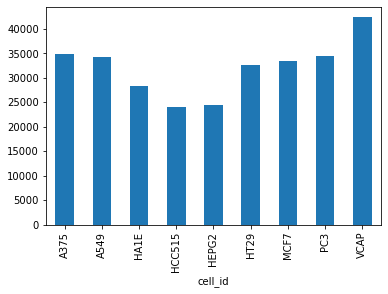

In [20]:
# # overlap the right one when calculating
# highest_perts = cell_line_grouping.pert_id[cell_line_grouping.pert_id > 10000]
# highest_perts.plot.bar()

<AxesSubplot:xlabel='cell_id'>

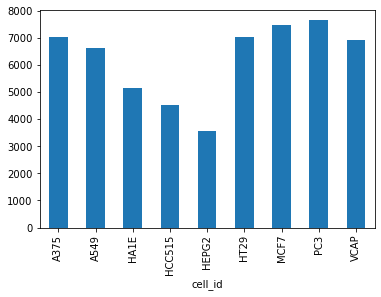

In [21]:
# highest_inchi = cell_line_grouping.inchi_key_prefix[cell_line_grouping.inchi_key_prefix > 3500]
# highest_inchi.plot.bar()

In [22]:
# cell_line_grouping_overlap = overlapped_df.groupby('cell_id').nunique()

In [23]:
# cell_line_grouping_overlap.inchi_key_prefix

cell_id
A375        1478
A549         760
A673         101
AGS          100
ASC          496
            ... 
U266           1
U937         103
VCAP         708
WSUDLCL2     100
YAPC        1477
Name: inchi_key_prefix, Length: 82, dtype: int64

<AxesSubplot:xlabel='cell_id'>

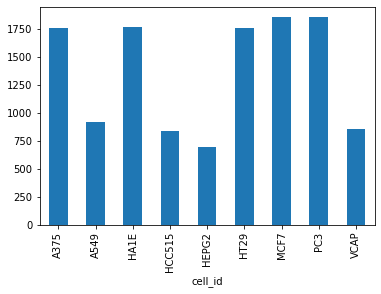

In [24]:
# highest_perts_overlap = cell_line_grouping_overlap.pert_id[cell_line_grouping.pert_id > 10000]
# highest_perts_overlap.plot.bar()

<AxesSubplot:xlabel='cell_id'>

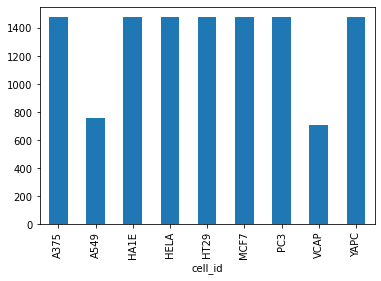

In [25]:
# highest_inchi_overlap = cell_line_grouping_overlap.inchi_key_prefix[cell_line_grouping_overlap.inchi_key_prefix > 700]
# highest_inchi_overlap.plot.bar()

In [15]:
# A549_overlapped_df.to_csv(output_dir + 'L1000_A549_overlap.tsv.gz', sep = '\t', index = False)

In [16]:
# overlapped_df.to_csv(output_dir + 'L1000_overlap.tsv.gz', sep = '\t', index = False)

In [ ]:
combined_df.to_csv(output_dir + 'L1000_full.tsv.gz', sep = '\t', index = False)